In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
print("reading data")

dirname = os.getcwd()+"\\test.csv"

inde_data = pd.read_csv(dirname,usecols=["x"]).to_numpy()
dep_data = pd.read_csv(dirname,usecols=["y"]).to_numpy()

print("reading complet")

inde_data = np.reshape(inde_data,(len(inde_data)))
dep_data = np.reshape(dep_data,(len(dep_data)))

reading data
reading complet


In [3]:
#random initilization position
pos=1.1
power=1.1

In [4]:
#the pesudo_logistic function
def adj_power(parameter1,parameter2):
    return (1/(1+parameter2**(-parameter1)))

In [5]:
def total_cost_calc(inde_data,dep_data,pos,power):
    total_cost = 0
    for temp1 in range(len(inde_data)):
        #subtracted and entered into the log function here------↓
        total_cost += (dep_data[temp1]-adj_power(inde_data[temp1]-pos,power))**2
    return total_cost

In [6]:
def pos_adjuster(inde_data,dep_data,pos,power,step_size):
    temp1 = total_cost_calc(inde_data,  dep_data,  (pos-step_size),(power+step_size))
    temp2 = total_cost_calc(inde_data,  dep_data,  (pos-step_size),(power-step_size))
    temp3 = total_cost_calc(inde_data,  dep_data,  (pos-step_size),power            )
    temp4 = total_cost_calc(inde_data,  dep_data,  (pos+step_size),power            )
    temp5 = total_cost_calc(inde_data,  dep_data,  (pos+step_size),(power+step_size))
    temp6 = total_cost_calc(inde_data,  dep_data,  (pos+step_size),(power-step_size))
    temp7 = total_cost_calc(inde_data,  dep_data,  pos            ,(power+step_size))
    temp8 = total_cost_calc(inde_data,  dep_data,  pos            ,(power-step_size))

    comp_array = [temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8]

    min_pos = comp_array.index(min(comp_array))

    if min_pos == 0:
        pos -= step_size
        power += step_size

    elif min_pos == 1:
        pos -= step_size
        power -= step_size

    elif min_pos == 2:
        pos -= step_size

    elif min_pos == 3:
        pos += step_size

    elif min_pos == 4:
        pos += step_size
        power += step_size

    elif min_pos == 5:
        pos += step_size
        power -= step_size
    
    elif min_pos == 6:
        power += step_size
    
    elif min_pos == 7:
        power -= step_size
    


    return pos,power

In [7]:
#some other constants
step_size = 1
step_size_decider_constant = 0
pos_nochange_array = [0]*3

In [8]:
def step_size_decider(parameter1):
    global step_size
    global step_size_decider_constant
    global pos_nochange_array

    step_size_decider_constant = (step_size_decider_constant + 1) % 3
    pos_nochange_array[step_size_decider_constant] = parameter1

    if pos_nochange_array[0]==pos_nochange_array[2]:
        step_size = step_size*0.5
    ## 0.5 is the dynamic change rate

1.1 1 1.1
2.1 0.5 0.10000000000000009
2.6 0.5 0.6000000000000001
3.1 0.5 0.6000000000000001
3.6 0.5 0.6000000000000001
4.1 0.5 0.6000000000000001
4.6 0.5 0.6000000000000001
5.1 0.5 0.6000000000000001
5.6 0.5 0.6000000000000001
6.1 0.5 0.6000000000000001
6.6 0.5 0.6000000000000001
7.1 0.5 0.6000000000000001
7.6 0.5 0.6000000000000001
8.1 0.5 0.6000000000000001
8.6 0.5 0.6000000000000001
9.1 0.5 0.6000000000000001
9.6 0.5 0.6000000000000001
9.1 0.25 0.6000000000000001
9.35 0.25 0.6000000000000001
9.6 0.25 0.6000000000000001
9.35 0.125 0.6000000000000001
9.475 0.125 0.6000000000000001
9.6 0.125 0.6000000000000001
9.475 0.0625 0.6000000000000001
9.5375 0.0625 0.6000000000000001
9.475 0.0625 0.6000000000000001
9.5375 0.03125 0.6000000000000001
9.50625 0.015625 0.6312500000000001
9.490625 0.0078125 0.6312500000000001
9.4984375 0.0078125 0.6312500000000001
9.50625 0.0078125 0.6312500000000001
9.4984375 0.0078125 0.6312500000000001
9.50625 0.00390625 0.6312500000000001
9.50234375 0.00390625 0.

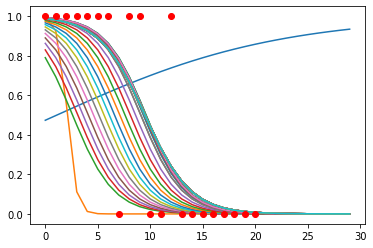

In [9]:
# matplotlib stuff
x = np.array(range(30))
for temp1 in range(50):
    print(pos,step_size,power)
    y = adj_power(x-pos,power)
    plt.plot(x,y)
    pos,power = pos_adjuster(inde_data,dep_data,pos,power,step_size)
    step_size_decider(pos+power)

print("threshold is at ",pos,"and step size is = ",step_size,". power constant is",power)
plt.plot(inde_data,dep_data,"ro")
plt.show()